In [1]:
# import required packages
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import chi2, r_regression, SelectKBest
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # For creating plots

In [2]:
# Function takes in the data to be imputted with the method which returns the imputted data 
def ImputeData(data, impute_method):
    return impute_method.fit_transform(data.astype(float))

In [3]:
# Function taking data and number of features to display a histogram of the feature value distribution
def VisualiseDataDistribution(data, no_feats):
    for i in range(0, no_feats):
        col = data[:, i]

        plt.hist(col)

        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.title('Distribution of Column {}'.format(i))

        plt.show()

In [4]:
# Function taking the data pre-imputation and post-imputation along with the number of features to show scatter diagrams of 
# where the imputted values fit in the existing data
def VisualiseDataScatter(original_data, imputted_data, no_feats):
    for i in range(0, no_feats):
        col = imputted_data[:, i] 
        nan_indices = np.argwhere(np.isnan(original_data[:, i].astype(float))) # get indices of no data from data pre-imputation

        # Create scatter plot
        plt.scatter(range(len(col)), col)
        plt.scatter(nan_indices, col[nan_indices], c='r', marker='x') # use indices on imputted data to plot

        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Scatter Plot of Column {}'.format(i))

        plt.show()

In [5]:
# Function taking in data to be encoded along with the desired encoding to return the encoded data array 
def encodeData(data, encoder):
    encoder.fit(data)
    
    print(encoder.categories_)
    
    return encoder.transform(data).flatten()

In [6]:
# Function taking data to be normalised/standardised along with the method to return the normalised/standardised data
def rescaleData(data, scale_method):
    return scale_method.fit_transform(data)

In [7]:
# Function taking feature data and target, along with the problem type so the suitable coefficient calculation method can be used
# to print and visualise the comparison of pvalues 
def FeatureCoefficient(features, target, problem_type):
    if problem_type=="classification":
        scores, pvalues = chi2(features, target)
        print("Pvalues:", scores)
        # Find and display the indexes of the 8 features with the highest correlation
        feature_idx = np.argsort(np.abs(pvalues))
        print("Top 8 features:", feature_idx[-8:])
        
        VisualisePvalues(scores)
    elif problem_type=="regression":
        pr = r_regression(features, target)
        print("Pvalues:", pr)
        # Display top 8 features with highest absolute correlation
        feature_idx = np.argsort(np.abs(pr))
        print("Top 8 features:", feature_idx[-8:])
        
        VisualisePvalues(pr)

In [8]:
# Function takes in pvalues calculated elsewhere to display a bar chart of pvalues to compare against each other
def VisualisePvalues(pvalues):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(pvalues)), np.abs(pvalues))
    plt.xticks(range(len(pvalues)), np.arange(0, len(pvalues)))
    plt.xlabel('Feature Index')
    plt.ylabel('P value')
    plt.show()

In [9]:
# Function takes in data to be calculate the correlation matrix and displays it
def VisualiseCorrMatrix(data):
    corr_matrix = np.corrcoef(data, rowvar=False)

    fig, ax = plt.subplots()
    im = ax.imshow(corr_matrix, cmap='coolwarm')
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[1]))
    ax.set_xticklabels(np.arange(0, data.shape[1]))
    ax.set_yticklabels(np.arange(0, data.shape[1]))
    plt.title('Correlation Matrix')
    plt.colorbar(im)
    plt.show()

In [10]:
# Function takes feature and target data, along with number of features and problem type to use the suitable calculation for 
# selecting the best features and returning them
def ChooseFeatures(features, target, no_feats, problem_type):
    if problem_type=="classification":
        skb = SelectKBest(chi2, k=no_feats)
        return skb.fit_transform(features, target)
    elif problem_type=="regression":
        skb = SelectKBest(r_regression, k=no_feats)
        return skb.fit_transform(features, target)

In [11]:
# Load star data set separating features as floats and class as strings in
star = np.genfromtxt('star_assessment.csv', delimiter=',', dtype='float', skip_header=True)
star_class = np.genfromtxt('star_assessment.csv', delimiter=',', dtype='str', skip_header=True, usecols = (17))
star_features = np.delete(star, -1, axis=1)

In [12]:
# Remove columns containing 'IDs' due to generally low trending and classification capability
star_features = np.delete(star_features, [0, 8, 9, 11, 16], axis=1)

In [13]:
# Reshape star class array to 2d array
star_class = star_class.reshape(100000, 1)
star_class.shape[1]

1

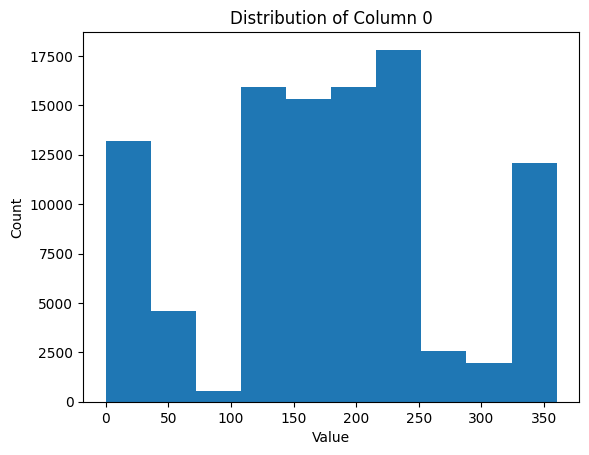

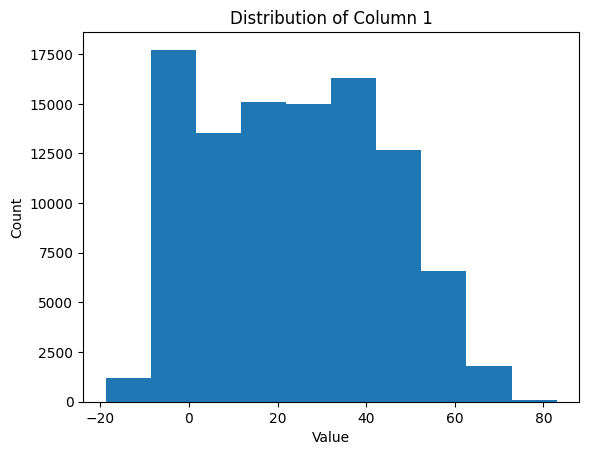

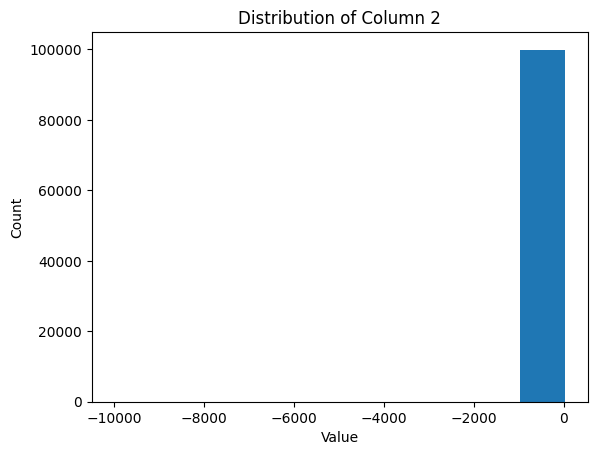

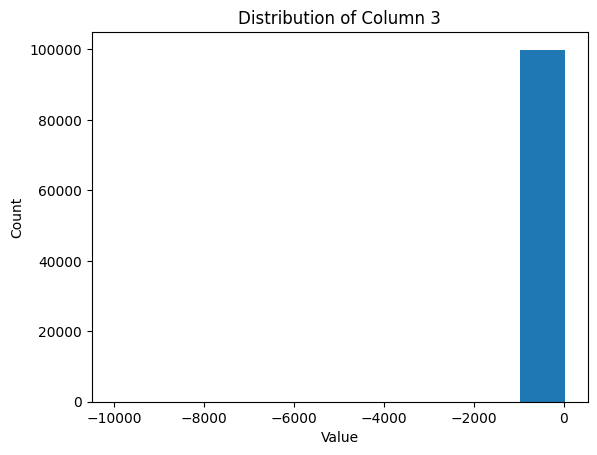

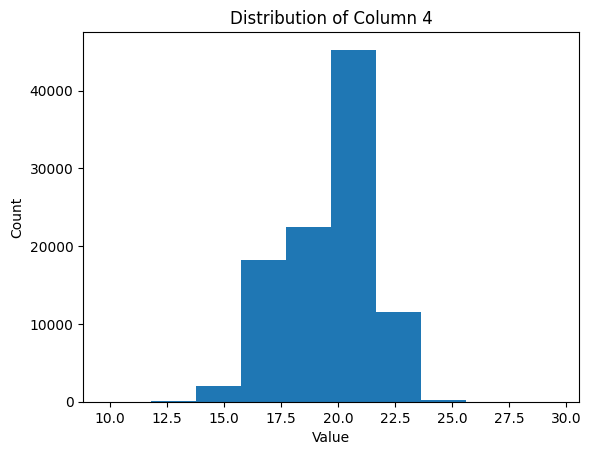

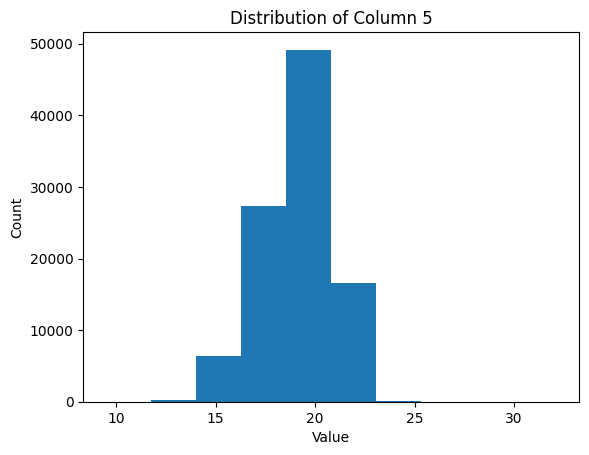

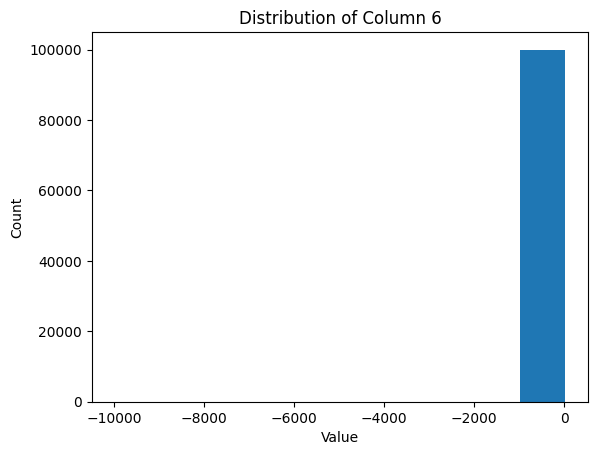

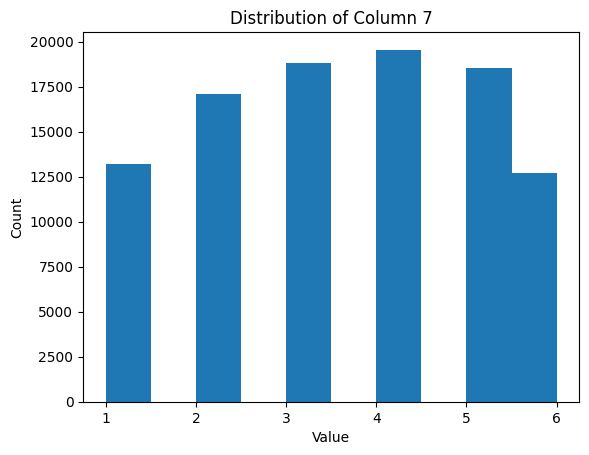

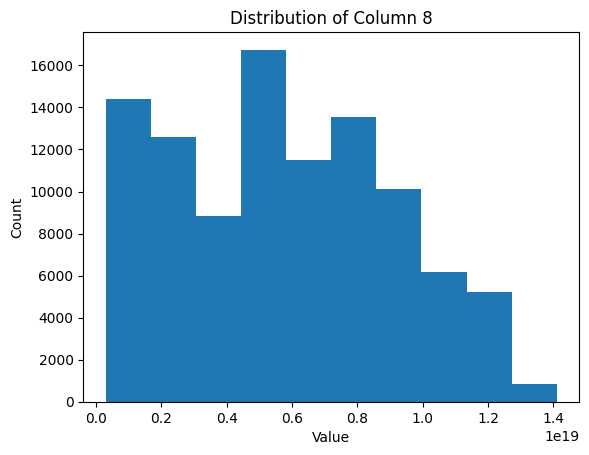

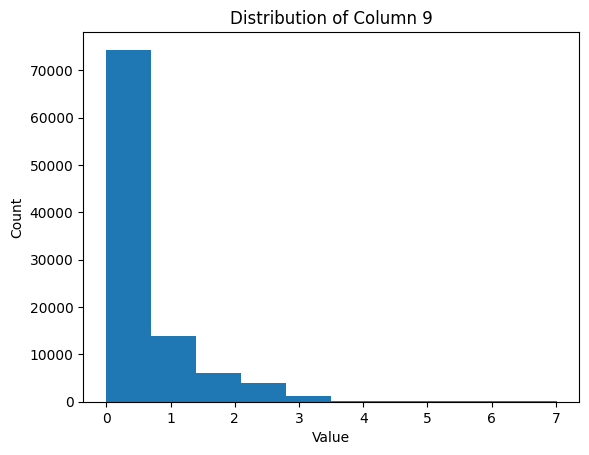

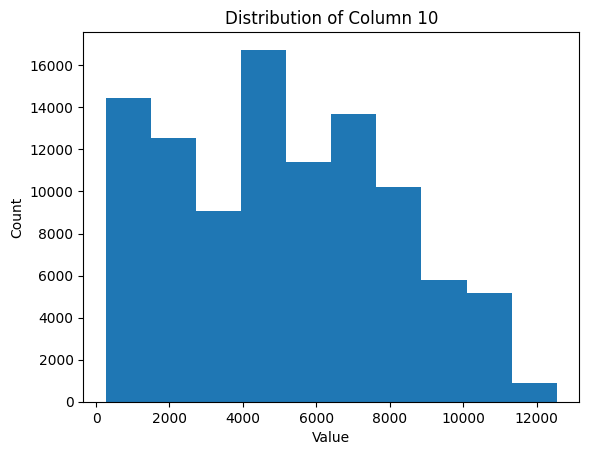

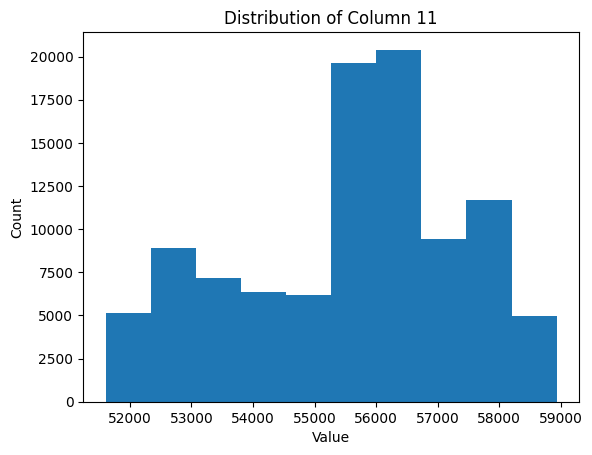

In [14]:
# Plot histograms to see distribution of feature data
VisualiseDataDistribution(star_features, star_features[0].shape[0])

In [15]:
# From the histograms its clear that there is generally no polarising distributions therefore it seems mean imputation is suitable
# impute missing values of features array 
star_features_imp_mean = ImputeData(star_features, SimpleImputer(strategy='mean'))

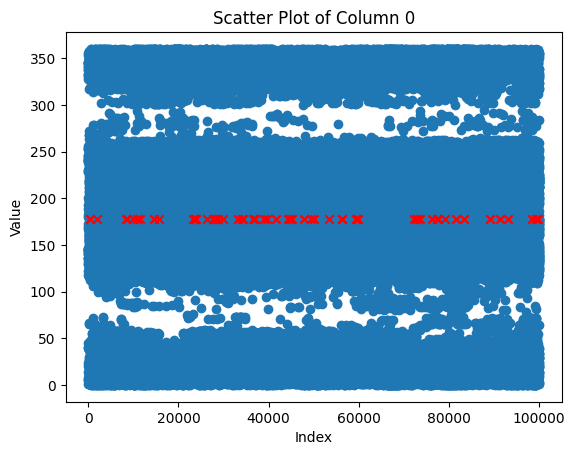

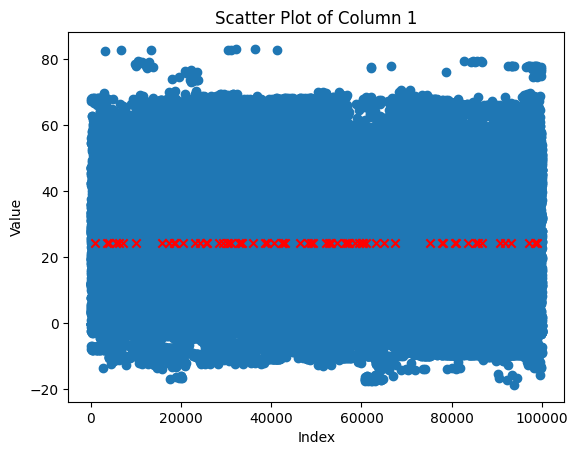

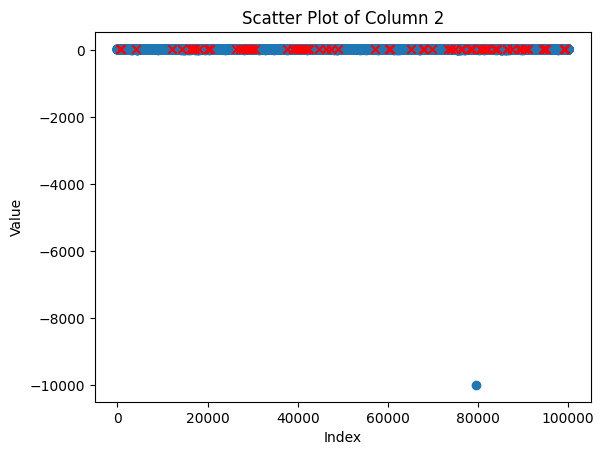

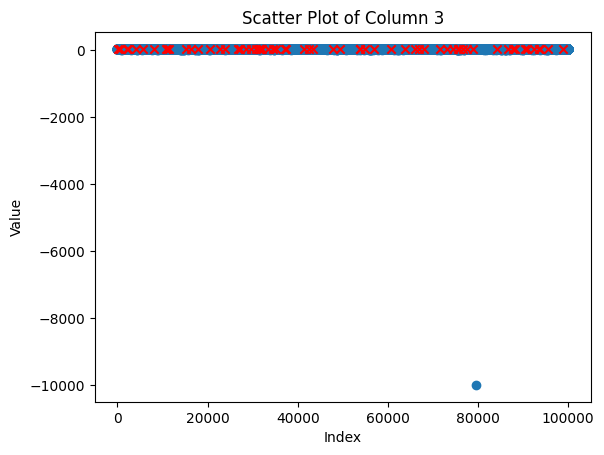

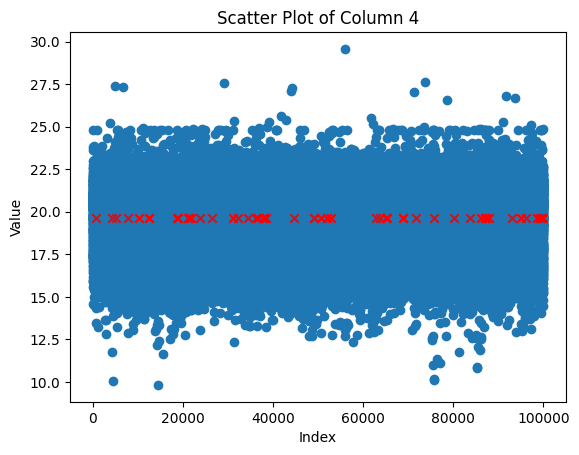

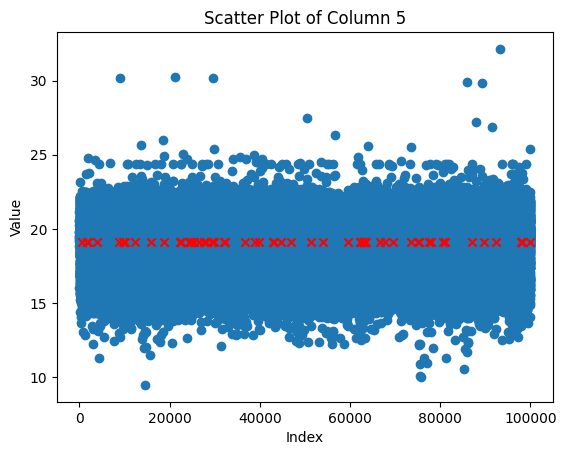

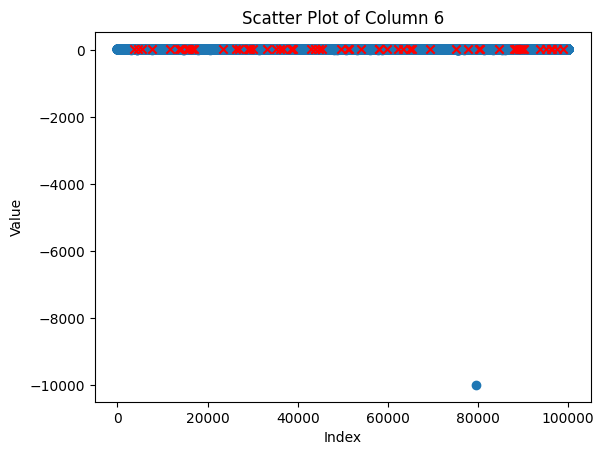

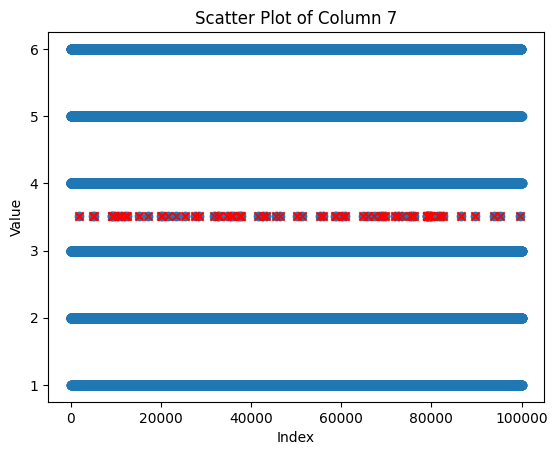

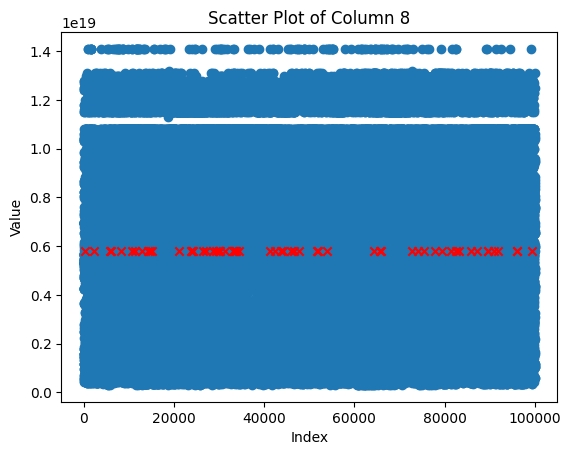

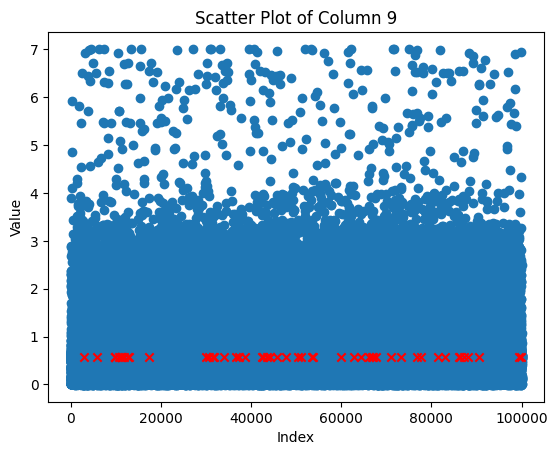

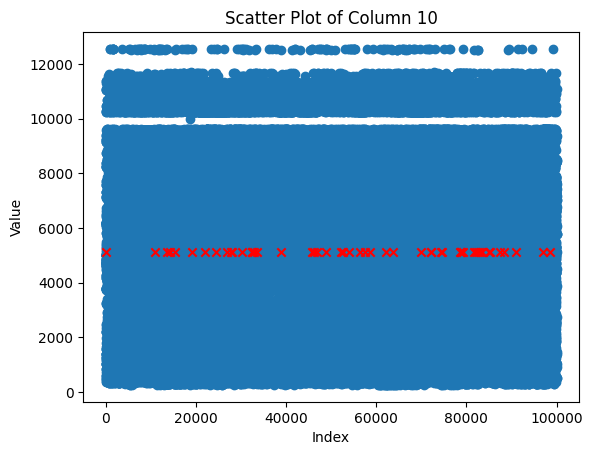

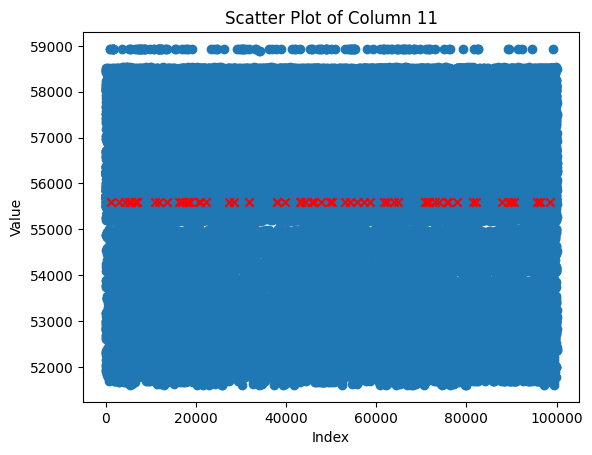

In [16]:
# Creating scatter plot for each column to mark imputted values and see if they fit    
VisualiseDataScatter(star_features, star_features_imp_mean, star_features[0].shape[0])

# The imputted data fits well and as there does not seem to be a correlation between index and value, KNN is not necessary

In [17]:
# Encode classes from strings to floats
star_class[:, 0] = encodeData(star_class[:, [0]], OrdinalEncoder(categories='auto', dtype=float))

[array(['GALAXY', 'QSO', 'STAR'], dtype='<U6')]


In [18]:
star_class

array([['0.0'],
       ['0.0'],
       ['0.0'],
       ...,
       ['0.0'],
       ['0.0'],
       ['0.0']], dtype='<U6')

In [19]:
# Normalise feature data
star_features_norm = rescaleData(star_features_imp_mean, MinMaxScaler(feature_range=(0, 1)))
star_features_norm[0]

array([0.37690482, 0.50380246, 0.99911256, 0.99907015, 0.53534443,
       0.42766462, 0.99894399, 0.2       , 0.45217391, 0.09183086,
       0.45159189, 0.64800655])

Pvalues: [6.39148175e+00 3.79734023e+01 6.09668060e-04 5.20045045e-04
 1.48881668e+02 2.01168208e+02 6.47329900e-04 1.07327834e+01
 1.36491269e+03 8.09782539e+03 1.36406997e+03 9.11680195e+02]
Top 8 features: [5 4 1 7 0 6 2 3]


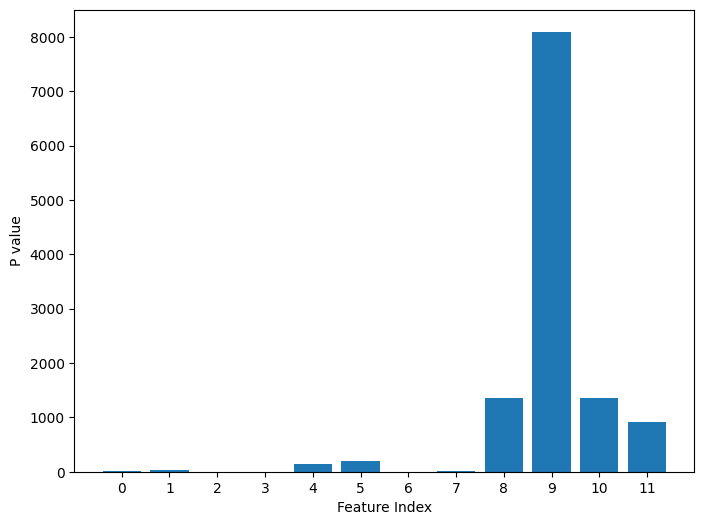

In [20]:
FeatureCoefficient(star_features_norm, star_class, "classification")

In [21]:
# Recombine the data set with classes now as floats
new_star = np.concatenate((star_features_imp_mean, star_class.reshape(-1, 1)), axis=1).astype(float)

new_star[0]

array([1.35689107e+02, 3.24946318e+01, 2.38788200e+01, 2.22753000e+01,
       2.03950100e+01, 1.91657300e+01, 1.87937100e+01, 2.00000000e+00,
       6.54000000e+18, 6.34793600e-01, 5.81200000e+03, 5.63540000e+04,
       0.00000000e+00])

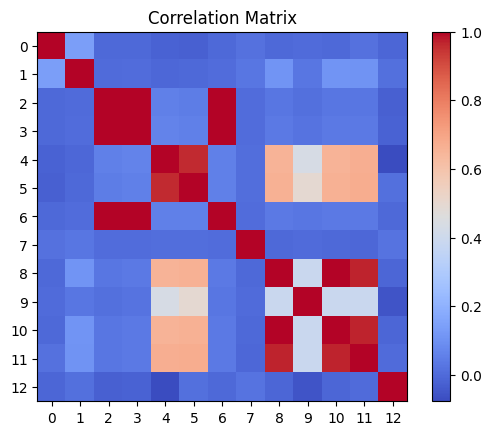

In [22]:
VisualiseCorrMatrix(new_star)

In [23]:
# Using the graph and correlation matrix it seems features index 8, 9, 10 and 11 are the most suitable for this problem as they correlate the best with each other and the classes
# take the top 4 features with SelectKBest 
star_features = ChooseFeatures(star_features_norm, new_star[:, -1], 4, "classification")

In [24]:
# New star feature data to use in model
star_features[0]

array([0.45217391, 0.09183086, 0.45159189, 0.64800655])

In [25]:
# Load gwp data set separating strings and floats to encode appropriately
gwp_float = np.genfromtxt('gwp_assessment.csv', delimiter=',', dtype='float', skip_header=True)
gwp_str = np.genfromtxt('gwp_assessment.csv', delimiter=',', dtype='str', skip_header=True)

gwp_float = np.delete(gwp_float, (0, 1, 2, 3), axis=1)
gwp_str = np.delete(gwp_str, (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), axis=1)

In [26]:
# Remove columns which provide no contribution to the model such as having all 0's
gwp_float = np.delete(gwp_float, [6, 7, 8], axis=1)
gwp_str = np.delete(gwp_str, 0, axis=1)

In [27]:
# Output categories for each feature
for i in range(0,3):
    read_oec = OrdinalEncoder(categories='auto', dtype='float')
    read_oec.fit(gwp_str[:, [i]])
    
    print(read_oec.categories_)


[array(['', 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype='<U11')]
[array(['', 'finishing', 'sweing'], dtype='<U11')]
[array(['', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype='<U11')]


In [28]:
# Using the categories outputted above a list containing all encodable categories can be made taking out the empty category so it is not encoded
categories = [[['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5']], [['finishing', 'sweing']], [['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday']]]

In [29]:
# Encode strings values to floats with the list of categories specified above, ensuring empty data remains as nan
for i in range(0,3):
    gwp_str[:, i] = encodeData(gwp_str[:, [i]], OrdinalEncoder(categories = categories[i], dtype = 'float', handle_unknown='use_encoded_value', unknown_value=np.nan))
    # replace original data in the dataset with encoded values
    
gwp_str

[array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)]
[array(['finishing', 'sweing'], dtype=object)]
[array(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype=object)]


array([['0.0', '1.0', '3.0'],
       ['0.0', '0.0', '3.0'],
       ['0.0', '1.0', '3.0'],
       ...,
       ['1.0', 'nan', '5.0'],
       ['1.0', '0.0', '5.0'],
       ['1.0', '0.0', '5.0']], dtype='<U11')

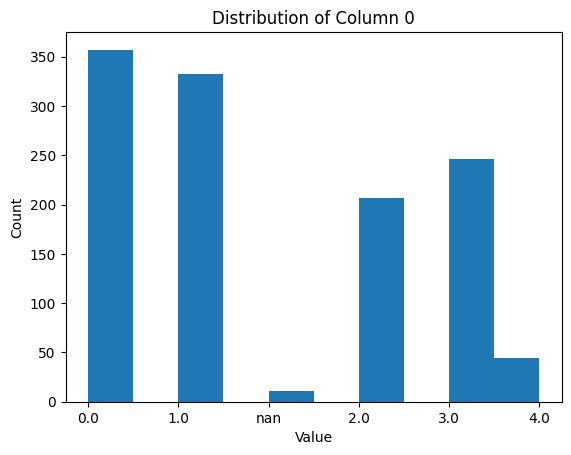

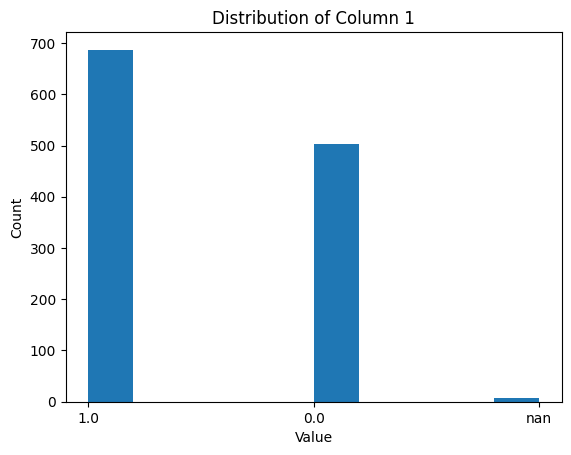

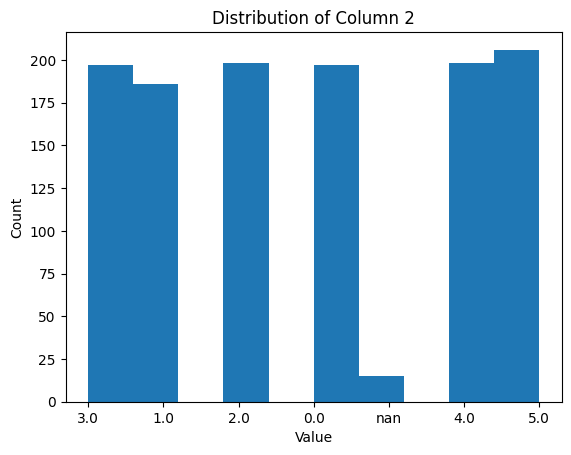

In [30]:
VisualiseDataDistribution(gwp_str, gwp_str[0].shape[0])

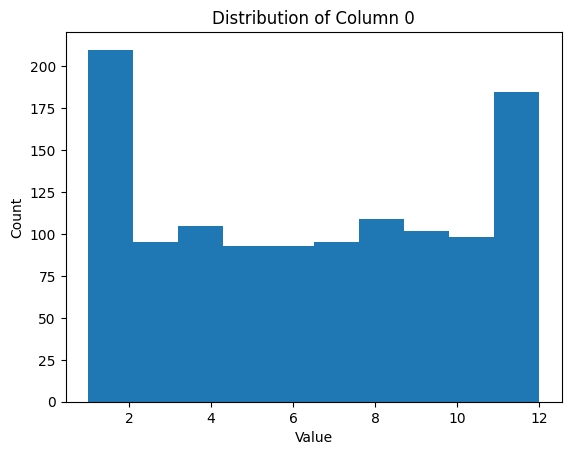

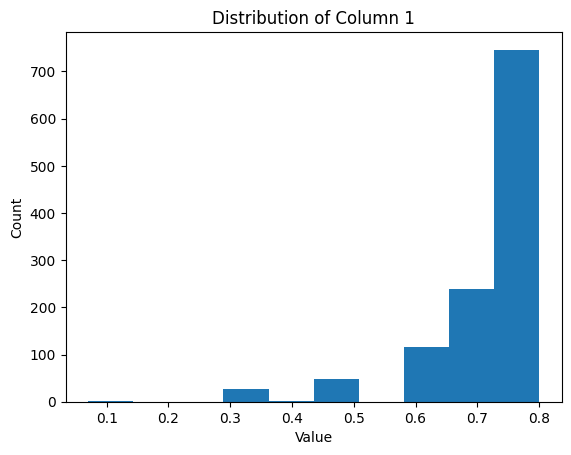

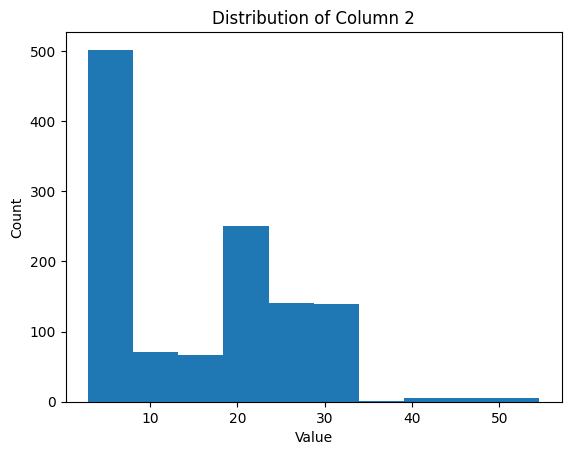

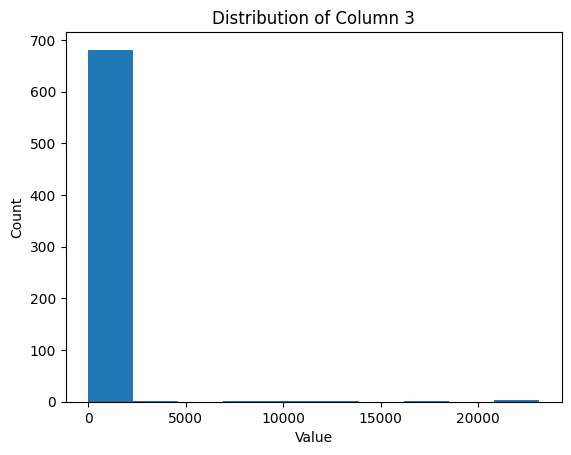

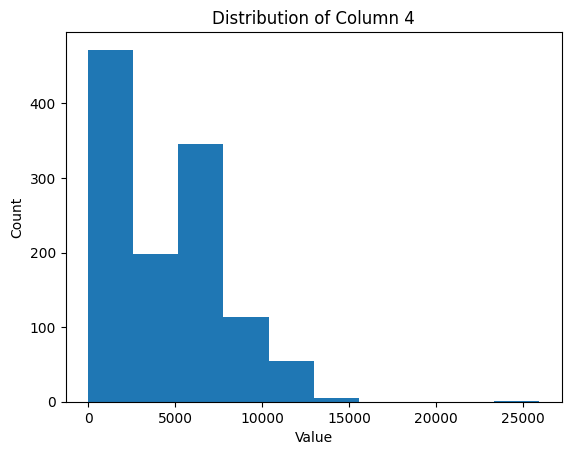

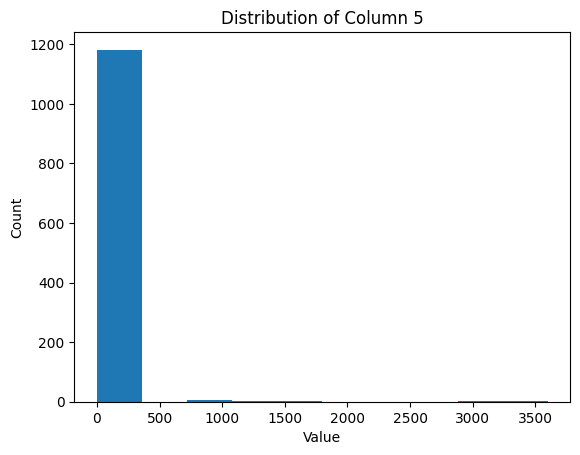

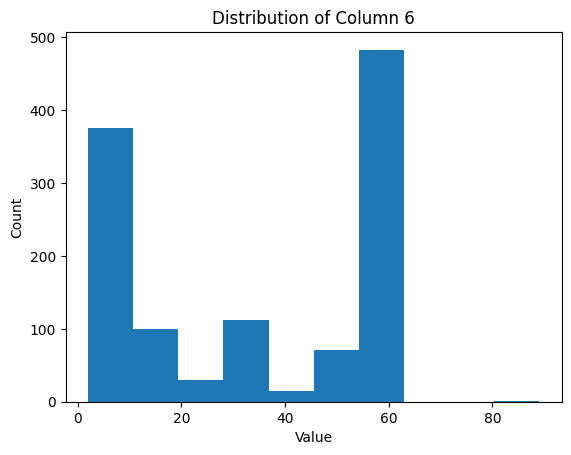

In [31]:
# Plot histograms to see distribution of feature data
VisualiseDataDistribution(gwp_float, gwp_float[0, :-1].shape[0])

In [32]:
# Seeing the limited data values for gwp_str it seems KNN Imputation would be suitable to avoid imputting data which is irregular 
# due to some outlier data in gwp_float, Simple mean imputation may cause skewing of resulting values, therefore using KNN Imputation with most frequent seems suitable
# impute missing values of features array 
knn_imp = KNNImputer()

gwp_imp1 = ImputeData(gwp_str, KNNImputer())
gwp_imp2 = ImputeData(gwp_float, KNNImputer())

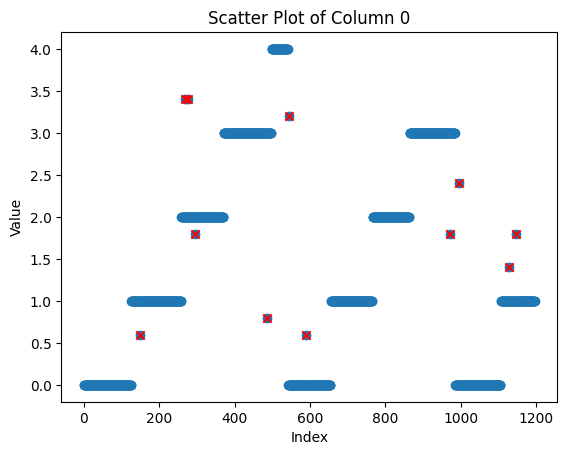

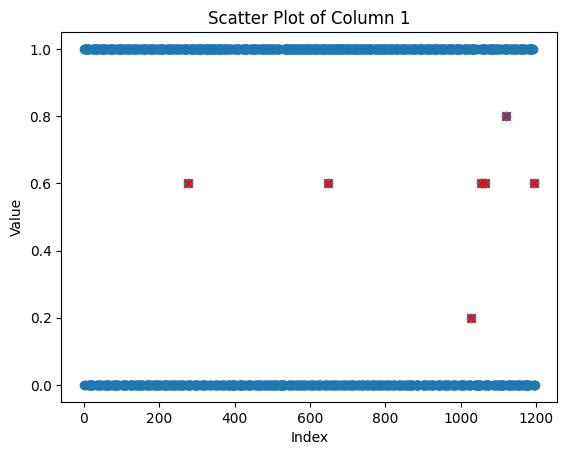

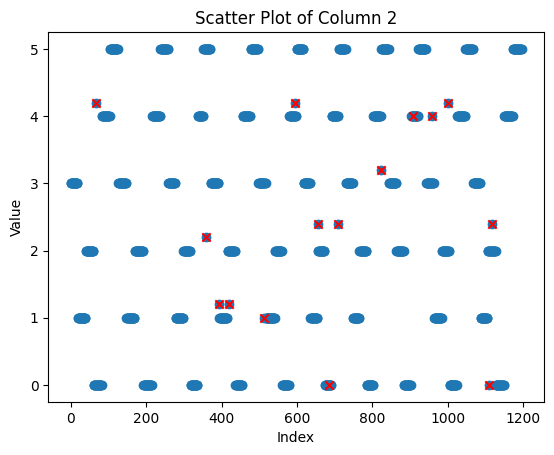

In [33]:
# Creating scatter plot for each column to mark imputted values and see if they fit
VisualiseDataScatter(gwp_str, gwp_imp1, gwp_str[0].shape[0])

In [34]:
# Seeing from the scatter plots that gwp_str imputation does not fit well, so using Simple mode imputation may be more suitable
gwp_imp1 = ImputeData(gwp_str, SimpleImputer(strategy = 'most_frequent'))

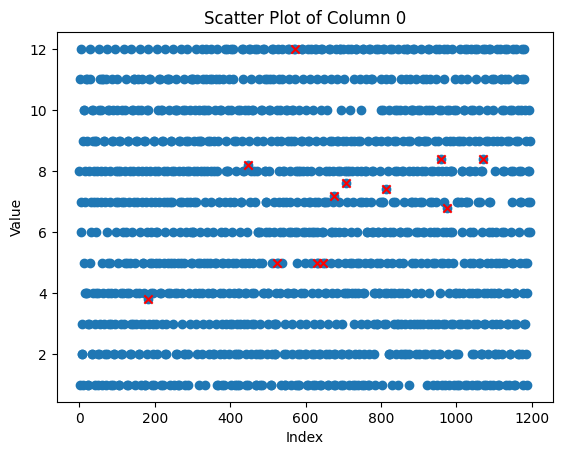

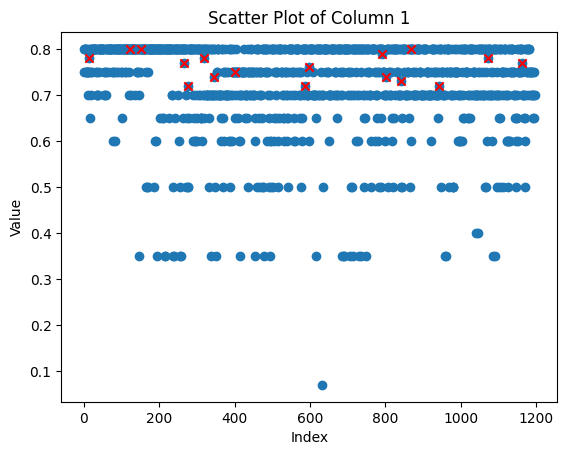

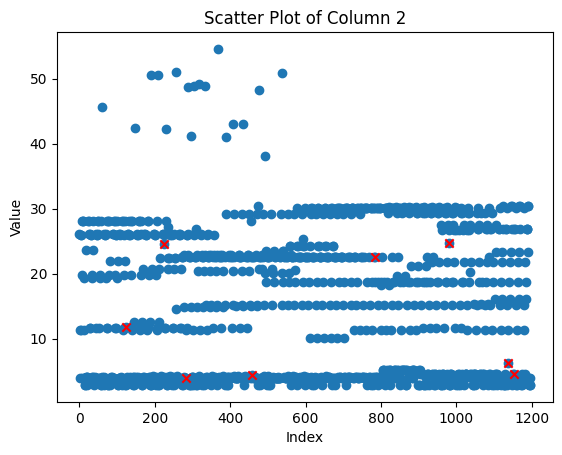

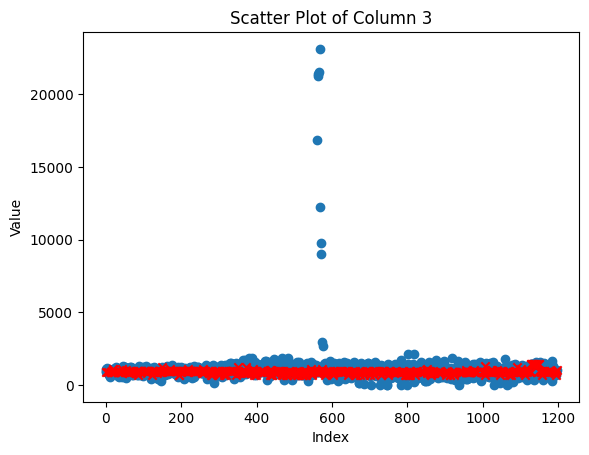

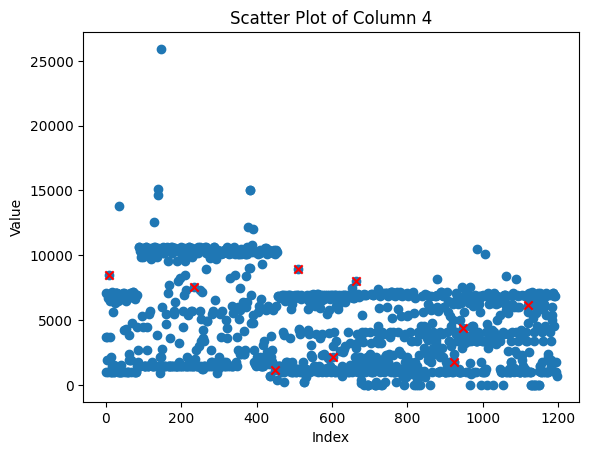

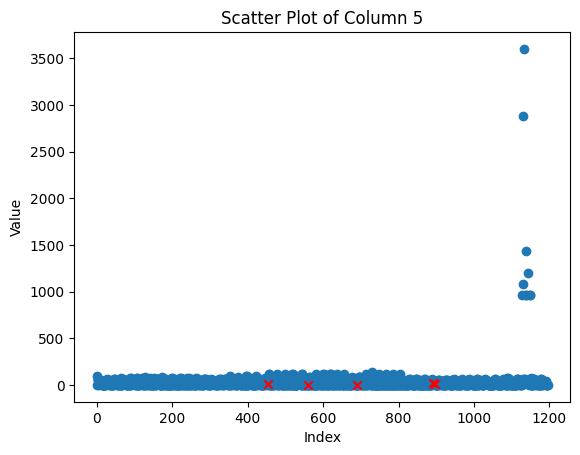

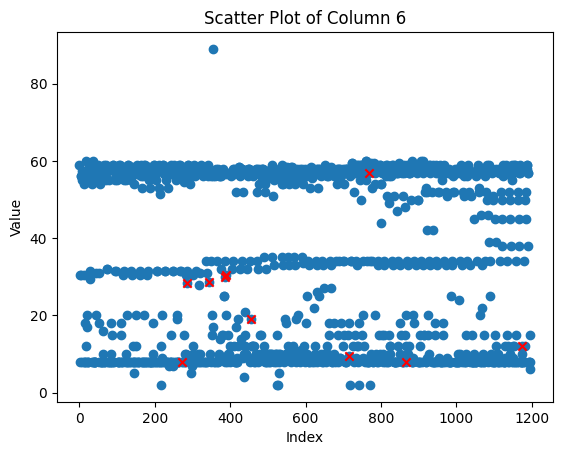

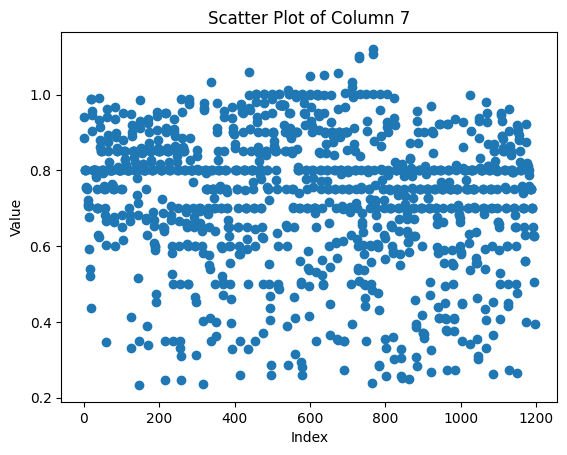

In [35]:
VisualiseDataScatter(gwp_float, gwp_imp2, gwp_float[0].shape[0])

In [36]:
# The imputted values for gwp_float seem to fit much better with some variance so it does not need to be re-done

In [37]:
gwp = np.concatenate((gwp_imp1, gwp_imp2), axis=1)

In [38]:
gwp[0]

array([0.00000000e+00, 1.00000000e+00, 3.00000000e+00, 8.00000000e+00,
       8.00000000e-01, 2.61600000e+01, 1.10800000e+03, 7.08000000e+03,
       9.80000000e+01, 5.90000000e+01, 9.40725424e-01])

Pvalues: [-0.05058608 -0.08851581 -0.01246744 -0.14936056  0.41443893 -0.11923964
  0.07645057 -0.05324739  0.07580164 -0.05543954]
Top 8 features: [7 9 8 6 1 5 3 4]


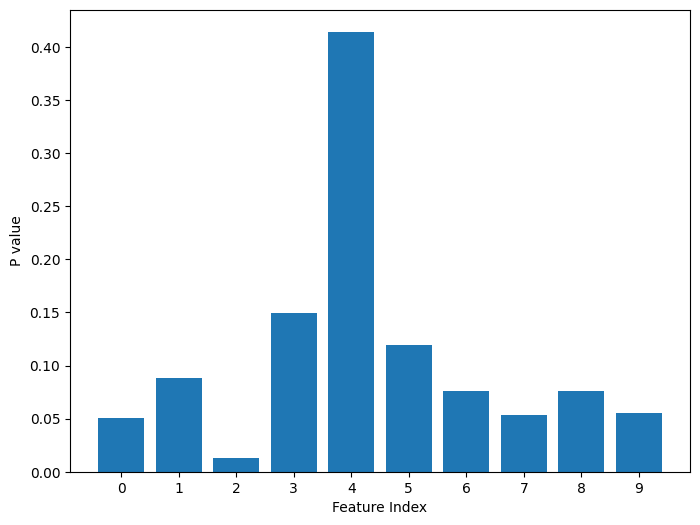

In [39]:
# Use pearson coefficient to measure features and class correlation
FeatureCoefficient(gwp[:, :-1], gwp[:, -1], "regression")

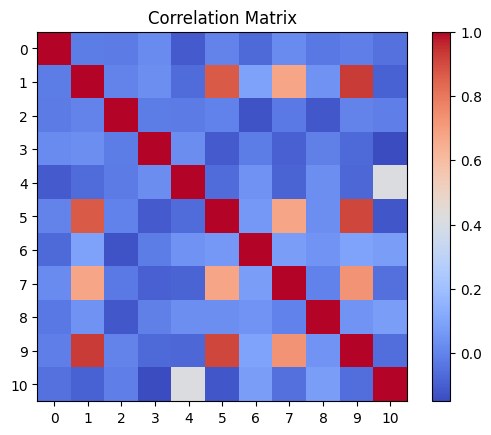

In [40]:
# Use np.corrcoef to find correlation between features and form matrix to plot
VisualiseCorrMatrix(gwp)

In [41]:
# Looking at the bar graph with the correlation matrix, its clear that 3 particular features have the best correlation with the target and the other features, namely indices 4, 6 and 8
# get the top 3 best features using r_regression 
gwp_features = ChooseFeatures(gwp[:, :-1], gwp[:, -1], 3, "regression")

In [42]:
# New star feature data to use in model
gwp_features[0]

array([8.000e-01, 1.108e+03, 9.800e+01])

In [43]:
# Normalise data to use in model
new_gwp = np.concatenate((gwp_features, gwp[:, -1].reshape(-1, 1)), axis=1).astype(float)
gwp_norm = rescaleData(new_gwp, MinMaxScaler(feature_range=(0, 1)))

# The Pearson correlation coefficient is used to measure the strength and direction of the relationship between two variables. This information is very useful for finding features in a data set which correlate well with the target and therefore would be useful for prediction for that target variable.
# Being able to discern correlation between data and lack of correlation is further useful for reducing the dimensionality of the data set where by only the most relevant features are kept for the modelling and the rest is discarded. This helps with model performance, and preventing overfitting essentially simplifying the model.
# Overall, the Pearson correlation coefficient handles the data set before modelling to help optimise it as much as possible prior to the prediction process.

In [44]:
# Save edited star data set
preprocessed_star = np.concatenate((star_features, star_class.reshape(-1, 1)), axis=1).astype(float)
np.save('star.npy', preprocessed_star)
preprocessed_star

array([[0.45217391, 0.09183086, 0.45159189, 0.64800655, 0.        ],
       [0.83333333, 0.11238889, 0.8288413 , 0.89432004, 0.        ],
       [0.35144928, 0.09316979, 0.35094862, 0.54396505, 0.        ],
       ...,
       [0.20362319, 0.02183899, 0.20340363, 0.399645  , 0.        ],
       [0.52898551, 0.06622931, 0.52805146, 0.64991808, 0.        ],
       [0.5826087 , 0.07874916, 0.58171159, 0.75040961, 0.        ]])

In [45]:
# Save edited star data set
preprocessed_gwp = gwp_norm
np.save('gwp.npy', preprocessed_gwp)
preprocessed_gwp

array([[1.        , 0.04763141, 0.02722222, 0.79733215],
       [0.93150685, 0.03925589, 0.        , 0.73618016],
       [1.        , 0.04157474, 0.01388889, 0.63927432],
       ...,
       [0.79452055, 0.03925589, 0.        , 0.44198192],
       [0.93150685, 0.02879515, 0.        , 0.30695115],
       [0.8630137 , 0.04501839, 0.        , 0.18158445]])

In [46]:
# Function which uses functions and steps taken in the notebook to completely pre-process the star dataset
def preprocessStarData():
    star = np.genfromtxt('star_assessment.csv', delimiter=',', dtype='float', skip_header=True)
    star_class = np.genfromtxt('star_assessment.csv', delimiter=',', dtype='str', skip_header=True, usecols = (17))
    star_features = np.delete(star, -1, axis=1)
    star_features = np.delete(star_features, [0, 8, 9, 11, 16], axis=1)
    star_class = star_class.reshape(100000, 1)
    star_features_imp_mean = ImputeData(star_features, SimpleImputer(strategy='mean'))
    star_class[:, 0] = encodeData(star_class[:, [0]], OrdinalEncoder(categories='auto', dtype=float))
    star_features_norm = rescaleData(star_features_imp_mean, MinMaxScaler(feature_range=(0, 1)))
    new_star = np.concatenate((star_features_imp_mean, star_class.reshape(-1, 1)), axis=1).astype(float)
    star_features = ChooseFeatures(star_features_norm, new_star[:, -1], 4, "classification")
    
    return np.concatenate((star_features, star_class.reshape(-1, 1)), axis=1).astype(float)

In [47]:
# Function which uses functions and steps taken in the notebook to completely pre-process the gwp dataset
def preprocessGWPData():
    gwp_float = np.genfromtxt('gwp_assessment.csv', delimiter=',', dtype='float', skip_header=True)
    gwp_str = np.genfromtxt('gwp_assessment.csv', delimiter=',', dtype='str', skip_header=True)

    gwp_float = np.delete(gwp_float, (0, 1, 2, 3), axis=1)
    gwp_str = np.delete(gwp_str, (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), axis=1)
    
    gwp_float = np.delete(gwp_float, [6, 7, 8], axis=1)
    gwp_str = np.delete(gwp_str, 0, axis=1)
    categories = [[['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5']], [['finishing', 'sweing']], [['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday']]]
    for i in range(0,3):
        gwp_str[:, i] = encodeData(gwp_str[:, [i]], OrdinalEncoder(categories = categories[i], dtype = 'float', handle_unknown='use_encoded_value', unknown_value=np.nan))
    
    gwp_imp1 = ImputeData(gwp_str, SimpleImputer(strategy = 'most_frequent'))
    gwp_imp2 = ImputeData(gwp_float, KNNImputer())
    
    gwp = np.concatenate((gwp_imp1, gwp_imp2), axis=1)
    gwp_features = ChooseFeatures(gwp[:, :-1], gwp[:, -1], 3, "regression")
    
    new_gwp = np.concatenate((gwp_features, gwp[:, -1].reshape(-1, 1)), axis=1).astype(float)
    gwp_norm = rescaleData(new_gwp, MinMaxScaler(feature_range=(0, 1)))
    
    return gwp_norm